# Data Analysis for Microstruture ML Model

### Import the necessary packages

In [15]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras import models

### Path to ML results

In [16]:
results = "results"

### Loads the trained model

In [17]:
model = models.load_model(os.path.join(results,"saved_model"))

### Gets the loss history from the model

In [18]:
history = pd.read_csv(os.path.join(results,"history.csv"))

### Plots the loss history

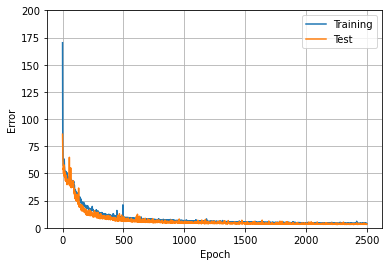

In [19]:
val_loss = history["val_loss"]
loss = history["loss"]
plt.plot(loss, label = "Training")
plt.plot(val_loss, label = "Test")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.ylim(0,200)
plt.savefig("loss_curve")

### Reads the results and statstics CSV files

In [20]:
results_m22 = pd.read_csv(os.path.join(results, "results_m22.csv"))
results_k = pd.read_csv(os.path.join(results, "results_k.csv"))
trainX = pd.read_csv(os.path.join(results,"trainX.csv"))
statistics = pd.read_csv(os.path.join(results,"statistics.csv"))

### Gets the actual and predicted values into arrays

In [21]:
m22_pred = results_m22["Predicted"].values
k_pred = results_k["Predicted"].values

m22_act = results_m22["Actual"].values
k_act = results_k["Actual"].values

# m22_index = statistics[statistics["Parameter"] == "m22"].index
# k_index = statistics[statistics["Parameter"] == "k"].index

# m22_max = statistics.loc[m22_index,"Max"].values
# k_max = statistics.loc[k_index,"Max"].values

m22_max = trainX["m22"].max()
k_max = trainX["k"].max()

### Parity plot for M22

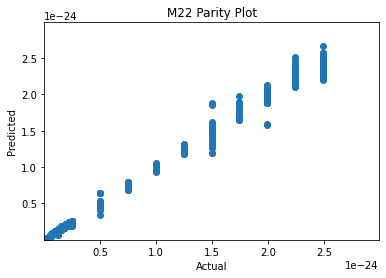

In [22]:
m22_real_pred = m22_pred*m22_max
m22_real_act = m22_act*m22_max

plt.scatter(m22_real_act, m22_real_pred)
plt.xlim(m22_real_act.min()*0.8, m22_real_act.max()*1.2)
plt.ylim(m22_real_act.min()*0.8, m22_real_act.max()*1.2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("M22 Parity Plot")
plt.savefig("m22_plot")

### Parity plot for Kappa

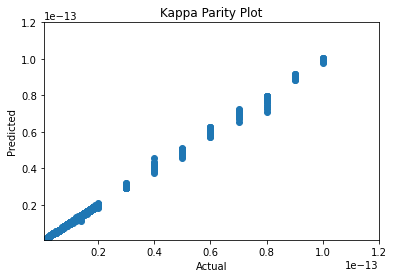

In [23]:
k_real_pred = k_pred*k_max
k_real_act = k_act*k_max

plt.scatter(k_real_act, k_real_pred)
plt.xlim(k_real_act.min()*0.8, k_real_act.max()*1.2)
plt.ylim(k_real_act.min()*0.8, k_real_act.max()*1.2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Kappa Parity Plot")
# plt.rcParams["figure.figsize"] = (4,3)
plt.savefig("k_plot")